In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [41]:
# Carga del dataset de prueba
df2 = pd.read_csv ('df_test2.csv')

In [42]:
# Se separa en X e y
X = df2.drop("review_score", axis=1)     # Elimino de mi dataset la variable a predecir
y = df2.review_score                     # Defino el Target

In [43]:
# Separación del 70% de las muestras para entrenamiento
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=30)

# Árbol de decisión

In [68]:
# Creamos un arbol de decisión sencillo y lo entrenamos
clf = DecisionTreeClassifier(max_depth=8, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [69]:
# Prueba de predicción
y_test_pred = clf.predict(X_test) 

In [70]:
# Cálculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6388974778037899


[[ 3001  6583]
 [ 1592 11463]]


c:\pythonMiniconda\envs\ds\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


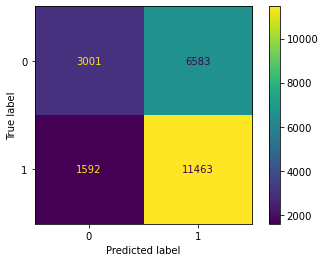

In [71]:
# Matríz de confusión
CF_MX = confusion_matrix(y_test,y_test_pred)
print(CF_MX)
plot_confusion_matrix(clf, X_test, y_test)

VP = CF_MX[0,0]
FP = CF_MX[0,1]
FN = CF_MX[1,0]
VN = CF_MX[1,1]

plt.show()

c:\pythonMiniconda\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


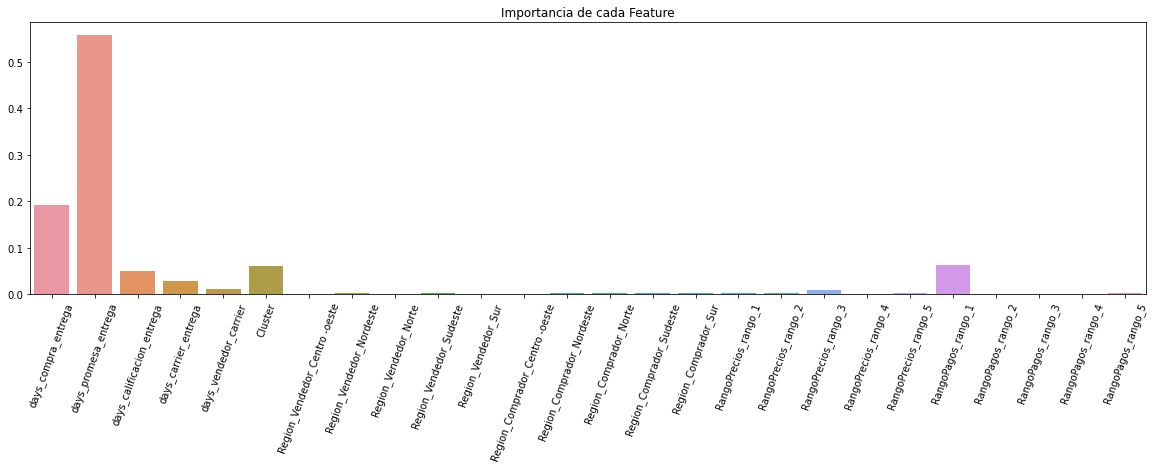

In [72]:
# Variables influyentes
plt.figure(figsize=(20,5))
importances = clf.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.xticks(rotation=70)
plt.show()


In [73]:
data = {'Algoritmo':'DecisionTreeClassifier','DataSet':'df_test2.csv','accuracy_score':test_accuracy,'VP':VP,'FP':FP,'FN':FN,'VN':VN}
df_res1 = pd.DataFrame.from_dict(data, orient='index')

# Random Forest

In [52]:
# Creamos un random forest y lo entrenamos
model = RandomForestClassifier(random_state=12, n_estimators=300,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=300, random_state=12)

In [53]:
# Prueba de predicción
y_test_pred = model.predict(X_test)

In [54]:
# Cálculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.650519744397656


[[ 7772  6643]
 [ 5225 14319]]


c:\pythonMiniconda\envs\ds\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


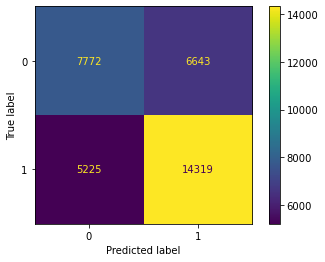

In [55]:
# Matríz de confusión
CF_MX = confusion_matrix(y_test,y_test_pred)
print(CF_MX)
plot_confusion_matrix(model, X_test, y_test)

VP = CF_MX[0,0]
FP = CF_MX[0,1]
FN = CF_MX[1,0]
VN = CF_MX[1,1]

plt.show()

c:\pythonMiniconda\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


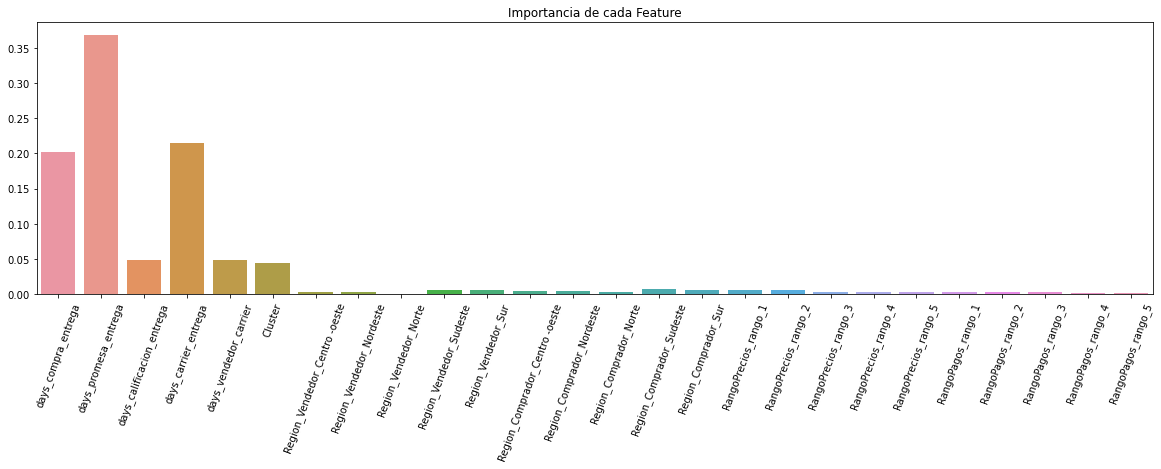

In [56]:
# Variables influyentes
plt.figure(figsize=(20,5))
importances = model.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.xticks(rotation=70)
plt.show()


In [57]:
data = {'Algoritmo':'RandomForestClassifier','DataSet':'df_test2.csv','accuracy_score':test_accuracy,'VP':VP,'FP':FP,'FN':FN,'VN':VN}
df_res2 = pd.DataFrame.from_dict(data, orient='index')

# XGboost

In [58]:
import xgboost as xgb

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [60]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)

In [61]:
clf_xgb.fit(X_train,y_train) #Entrenamos el modelo

c:\pythonMiniconda\envs\ds\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\pythonMiniconda\envs\ds\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:20:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [62]:
y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test

In [63]:
# Cálculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6385882768673528


[[ 3077  6507]
 [ 1675 11380]]


c:\pythonMiniconda\envs\ds\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


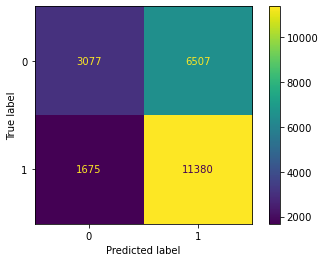

In [64]:
# Matríz de confusión
CF_MX = confusion_matrix(y_test,y_test_pred)
print(CF_MX)
plot_confusion_matrix(clf_xgb, X_test, y_test)

VP = CF_MX[0,0]
FP = CF_MX[0,1]
FN = CF_MX[1,0]
VN = CF_MX[1,1]

plt.show()

c:\pythonMiniconda\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


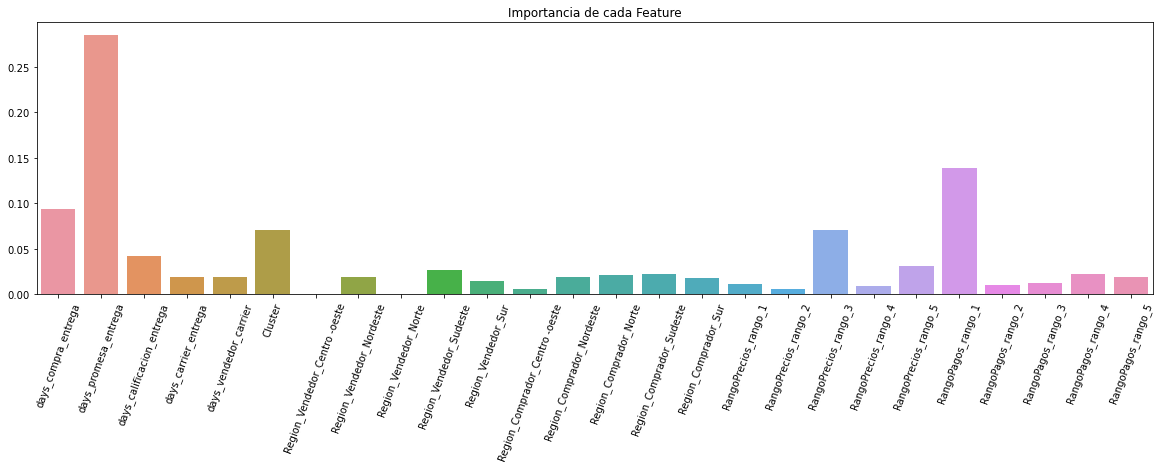

In [65]:
# Variables influyentes
plt.figure(figsize=(20,5))
importances = clf_xgb.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.xticks(rotation=70)
plt.show()

In [66]:
data = {'Algoritmo':'XGBClassifier','DataSet':'df_test2.csv','accuracy_score':test_accuracy,'VP':VP,'FP':FP,'FN':FN,'VN':VN}
df_res3 = pd.DataFrame.from_dict(data, orient='index')

# Resultados

In [74]:
pd.concat([df_res1,df_res2,df_res3],axis=1)

,0,0,0
Algoritmo,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier
DataSet,df_test2.csv,df_test2.csv,df_test2.csv
accuracy_score,0.638897,0.65052,0.638588
VP,3001,7772,3077
FP,6583,6643,6507
FN,1592,5225,1675
VN,11463,14319,11380


# Hypertuning de parámetros

- Decision Tree

In [27]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV

In [28]:
dt = DecisionTreeClassifier()
params = {
    'max_depth':[5,6,7,8],
    'random_state':[42]
}

grid_decisionTree = GridSearchCV(dt ,param_grid = params,cv = 5)

In [29]:
#Entrenamos el modelo
grid_decisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8], 'random_state': [42]})

In [30]:
print("Mejores parametros: "+str(grid_decisionTree.best_params_))
print("Mejor Score: "+str(grid_decisionTree.best_score_)+'\n')

Mejores parametros: {'max_depth': 8, 'random_state': 42}
Mejor Score: 0.6333207812960633



- Random Forest

In [31]:
# Hypertuning utilizando grid search
rf = RandomForestClassifier()
params = {
    'random_state' : [12],
    'n_estimators': [200,300],
    'class_weight': ['balanced'],
    'max_features': ['log2']
}

grid_random_forest = GridSearchCV(rf ,param_grid = params,cv = 5)

In [32]:
# Entrenamos el modelo
grid_random_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_features': ['log2'],
                         'n_estimators': [200, 300], 'random_state': [12]})

In [33]:
print("Mejores parametros: "+str(grid_random_forest.best_params_))
print("Mejor Score: "+str(grid_random_forest.best_score_)+'\n')

Mejores parametros: {'class_weight': 'balanced', 'max_features': 'log2', 'n_estimators': 300, 'random_state': 12}
Mejor Score: 0.6492668176203557

